<!-- Lab1 - Desenvolvido por Silmara Basso -->
# <font color='Green'>Agrupamento e Sumarização</font>
## <font color='Green'>Storytelling, Dashboards e Técnicas de Apresentação Para Cientistas de Dados</font>
## <font color='Green'>Lab1 - Parte 2</font>
### <font color='Green'>Engajando a Audiência Através de História Sobre a Análise dos Dados</font>

## Instalando e Carregando os Pacotes

In [ ]:
# Plotly
#!pip install -q plotly

In [ ]:
# colorlover
#!pip install -q colorlover

In [116]:
# Imports
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
import colorlover as cl
from matplotlib import style
import matplotlib.ticker as mticker
from datetime import datetime, timedelta
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Silmara Basso" 

Author: Silmara Basso



## Carregando os Dados

In [3]:
# Carrega o dataset
df_agrup = pd.read_csv('dataset1.csv')

In [4]:
# Shape
df_agrup.shape

(116581, 53)

In [5]:
# Amostra dos dados
df_agrup.head()

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,seller_city,seller_state,product_category_name_english,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,10,0,10,Mon,Oct
3,ON40291,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017,8,1,18,Tue,Aug
4,ON74313,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,...,Maua,SP,housewares,0.0,2017,8,2,18,Wed,Aug


## Cena 2 - Agrupamento e Sumarização

### Feature Extraction (Extração de Atributos)

Nesta fase, novas colunas serão adicionadas contendo cálculos de várias colunas para obter novos recursos.

In [6]:
# Prepara os dados
date_columns = ['order_purchase_timestamp', 
                'order_approved_at', 
                'order_delivered_carrier_date', 
                'order_delivered_customer_date',
                'order_estimated_delivery_date', 
                'shipping_limit_date', 
                'review_creation_date', 
                'review_answer_timestamp'] 

In [7]:
# Loop para formatar as datas
for col in date_columns:
    df_agrup[col] = pd.to_datetime(df_agrup[col], format = '%Y-%m-%d %H:%M:%S')

In [8]:
# Cria uma coluna order_process_time para ver quanto tempo levou 
# desde o início do pedido feito pelo cliente até a entrega
df_agrup['order_process_time'] = df_agrup['order_delivered_customer_date'] - df_agrup['order_purchase_timestamp']

In [9]:
# Cria uma coluna order_delivery_time para ver quanto tempo cada pedido levou para entrega
df_agrup['order_delivery_time'] = df_agrup['order_delivered_customer_date'] - df_agrup['order_delivered_carrier_date']

In [10]:
# Cria uma coluna order_time_accuracy para ver se o tempo estimado para entrega foi apropriado ou não
# Se o valor for positivo chegou mais rápido, se 0 então chegou no horário, mas se negativo então chegou atrasado
df_agrup['order_accuracy_time'] = df_agrup['order_estimated_delivery_date'] - df_agrup['order_delivered_customer_date']

In [11]:
df_agrup.head()

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,order_process_time,order_delivery_time,order_accuracy_time
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,1.0,2017,10,0,10,Mon,Oct,8 days 10:28:40,6 days 01:30:13,7 days 02:34:47
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,1.0,2017,10,0,10,Mon,Oct,8 days 10:28:40,6 days 01:30:13,7 days 02:34:47
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,1.0,2017,10,0,10,Mon,Oct,8 days 10:28:40,6 days 01:30:13,7 days 02:34:47
3,ON40291,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1.0,...,1.0,2017,8,1,18,Tue,Aug,2 days 20:15:12,0 days 23:16:10,9 days 09:15:17
4,ON74313,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1.0,...,0.0,2017,8,2,18,Wed,Aug,5 days 00:05:14,3 days 00:54:18,7 days 05:29:59


### Pergunta 2.1 - Top 20 Categorias de Produtos Mais Vendidos

In [12]:
# Top 20 categorias de produtos mais vendidos
top_20_produtos_mais_vendidos = df_agrup['order_item_id'] \
                                .groupby(df_agrup['product_category_name_english']) \
                                .count().sort_values(ascending = False)[:20]

In [13]:
# Lista os 5 primeiros resultados
top_20_produtos_mais_vendidos.head()

product_category_name_english
bed bath table           11990
health beauty            10030
sports leisure            9005
furniture decor           8833
computers accessories     8151
Name: order_item_id, dtype: int64

In [ ]:
def show_named_plotly_colours():
    """
    function to display to user the colours to match plotly's named
    css colours.

    Reference:
        #https://community.plotly.com/t/plotly-colours-list/11730/3

    Returns:
        plotly dataframe with cell colour to match named colour name

    """
    s='''
        aliceblue, antiquewhite, aqua, aquamarine, azure,
        beige, bisque, black, blanchedalmond, blue,
        blueviolet, brown, burlywood, cadetblue,
        chartreuse, chocolate, coral, cornflowerblue,
        cornsilk, crimson, cyan, darkblue, darkcyan,
        darkgoldenrod, darkgray, darkgrey, darkgreen,
        darkkhaki, darkmagenta, darkolivegreen, darkorange,
        darkorchid, darkred, darksalmon, darkseagreen,
        darkslateblue, darkslategray, darkslategrey,
        darkturquoise, darkviolet, deeppink, deepskyblue,
        dimgray, dimgrey, dodgerblue, firebrick,
        floralwhite, forestgreen, fuchsia, gainsboro,
        ghostwhite, gold, goldenrod, gray, grey, green,
        greenyellow, honeydew, hotpink, indianred, indigo,
        ivory, khaki, lavender, lavenderblush, lawngreen,
        lemonchiffon, lightblue, lightcoral, lightcyan,
        lightgoldenrodyellow, lightgray, lightgrey,
        lightgreen, lightpink, lightsalmon, lightseagreen,
        lightskyblue, lightslategray, lightslategrey,
        lightsteelblue, lightyellow, lime, limegreen,
        linen, magenta, maroon, mediumaquamarine,
        mediumblue, mediumorchid, mediumpurple,
        mediumseagreen, mediumslateblue, mediumspringgreen,
        mediumturquoise, mediumvioletred, midnightblue,
        mintcream, mistyrose, moccasin, navajowhite, navy,
        oldlace, olive, olivedrab, orange, orangered,
        orchid, palegoldenrod, palegreen, paleturquoise,
        palevioletred, papayawhip, peachpuff, peru, pink,
        plum, powderblue, purple, red, rosybrown,
        royalblue, saddlebrown, salmon, sandybrown,
        seagreen, seashell, sienna, silver, skyblue,
        slateblue, slategray, slategrey, snow, springgreen,
        steelblue, tan, teal, thistle, tomato, turquoise,
        violet, wheat, white, whitesmoke, yellow,
        yellowgreen
        '''
    li=s.split(',')
    li=[l.replace('\n','') for l in li]
    li=[l.replace(' ','') for l in li]

    import pandas as pd
    import plotly.graph_objects as go

    df=pd.DataFrame.from_dict({'colour': li})
    fig = go.Figure(data=[go.Table(
      header=dict(
        values=["Plotly Named CSS colours"],
        line_color='black', fill_color='white',
        align='center', font=dict(color='black', size=14)
      ),
      cells=dict(
        values=[df.colour],
        line_color=[df.colour], fill_color=[df.colour],
        align='center', font=dict(color='black', size=11)
      ))
    ])

    fig.show()

In [ ]:
show_named_plotly_colours()

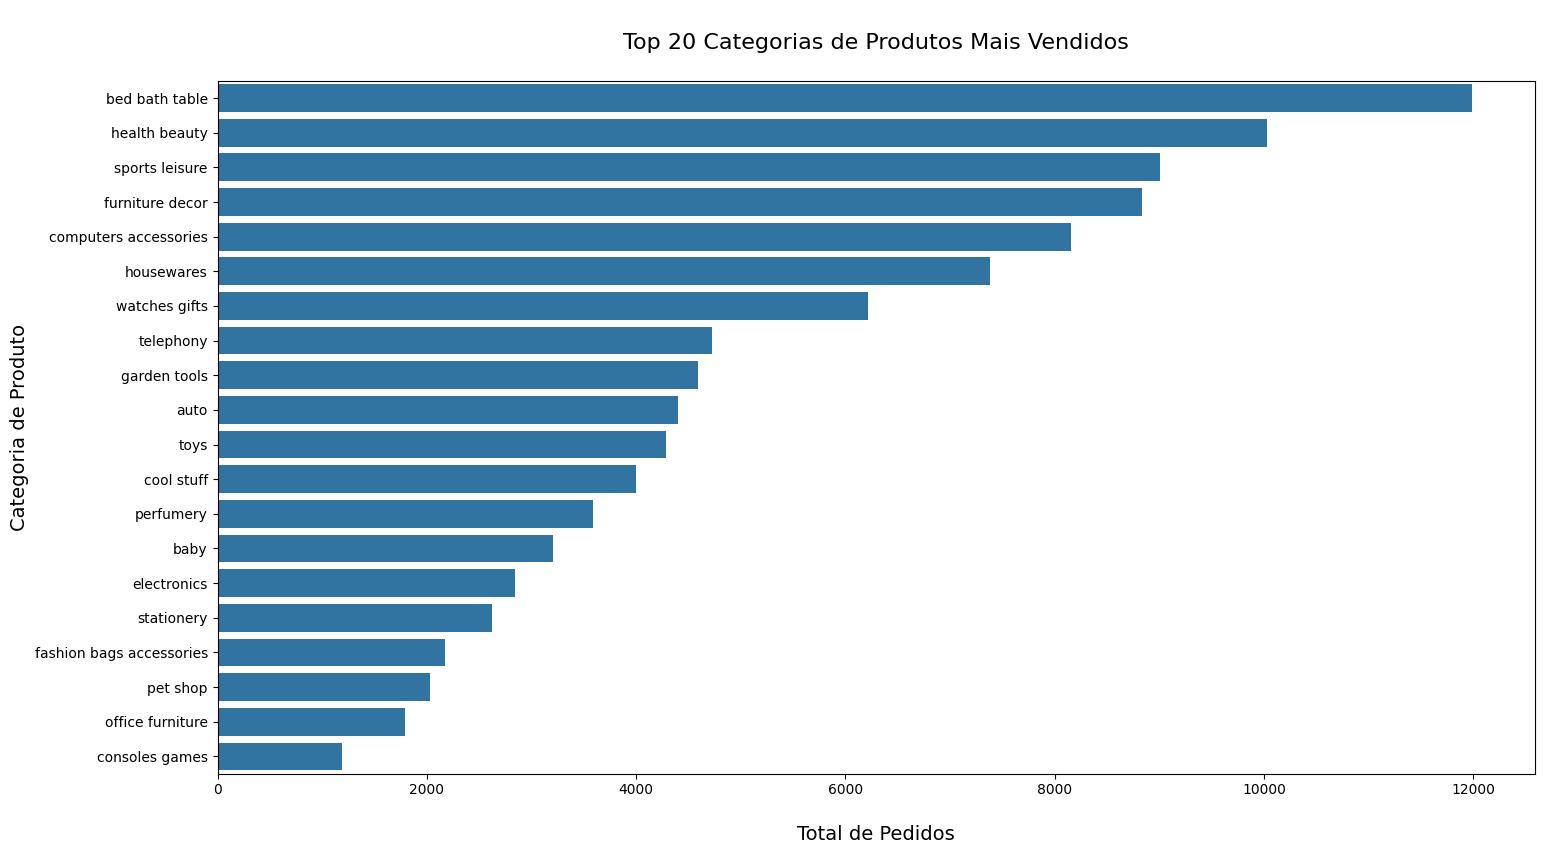

In [14]:
# Plot
fig = plt.figure(figsize = (17,9))
sns.barplot(y = top_20_produtos_mais_vendidos.index, x = top_20_produtos_mais_vendidos.values)
plt.title('\nTop 20 Categorias de Produtos Mais Vendidos\n', fontsize = 16)
plt.xlabel('\nTotal de Pedidos', fontsize = 14)
plt.ylabel('Categoria de Produto', fontsize = 14)
plt.show();

### Pergunta 2.2 - Top 20 Cidades com Maior Volume de Vendas

In [15]:
# Top 20 cidades com mais vendas
top_20_cidades_mais_vendas = df_agrup['order_item_id'] \
                             .groupby(df_agrup['customer_city']) \
                             .count().sort_values(ascending = False)[:20]

In [16]:
# Lista os 5 primeiros resultados
top_20_cidades_mais_vendas.head()

customer_city
Sao Paulo         18412
Rio De Janeiro     8123
Belo Horizonte     3218
Brasilia           2452
Curitiba           1799
Name: order_item_id, dtype: int64

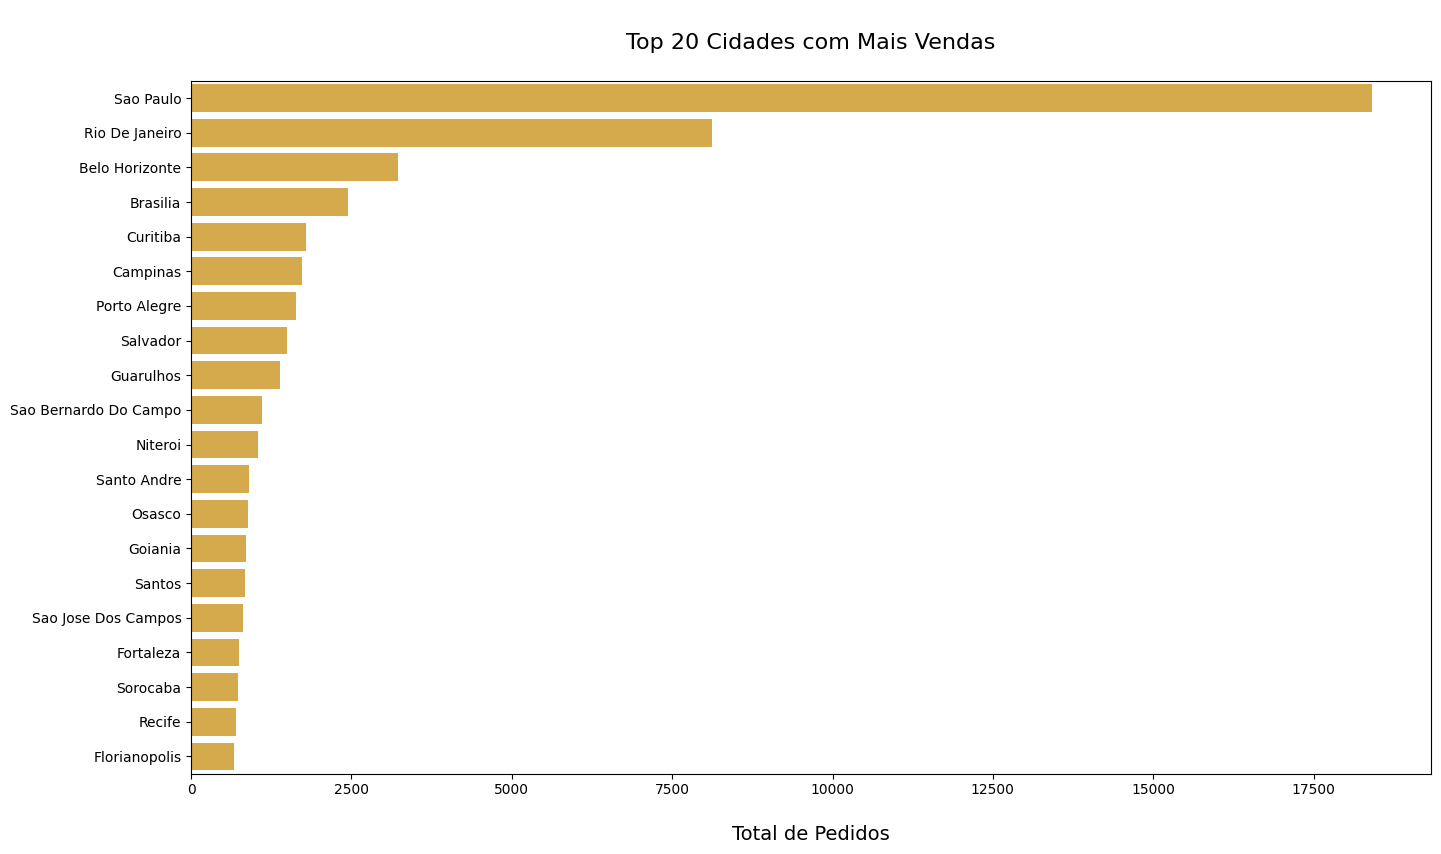

In [17]:
# Plot
fig = plt.figure (figsize = (16,9))
sns.barplot(y = top_20_cidades_mais_vendas.index, x = top_20_cidades_mais_vendas.values, color="#ECB235")
plt.title('\nTop 20 Cidades com Mais Vendas\n', fontsize = 16)
plt.xlabel('\nTotal de Pedidos', fontsize = 14)
plt.ylabel('', fontsize = 14)
plt.show();

### Pergunta 2.3 - Qual a Mediana do Tempo de Entrega Por Mês ao Longo do Tempo?

In [18]:
# Mediana do tempo de entrega de pedidos por mês
df_agrup['Month_order'] = df_agrup['order_purchase_timestamp'].dt.to_period('M').astype('str')

In [19]:
df_agrup['Month_order'].head()

0    2017-10
1    2017-10
2    2017-10
3    2017-08
4    2017-08
Name: Month_order, dtype: object

In [20]:
# Agrupa pelo mês e calcula a mediana somente da parte numérica da data
delivery_time_by_month = df_agrup['order_delivery_time'].groupby(df_agrup['Month_order']).median(numeric_only = False)

In [21]:
# Lista os 5 primeiros resultados
delivery_time_by_month.head()

Month_order
2016-09          7 days 01:30:53
2016-10          4 days 21:08:03
2016-12          1 days 09:40:17
2017-01   7 days 02:18:37.500000
2017-02          7 days 05:03:05
Name: order_delivery_time, dtype: timedelta64[ns]

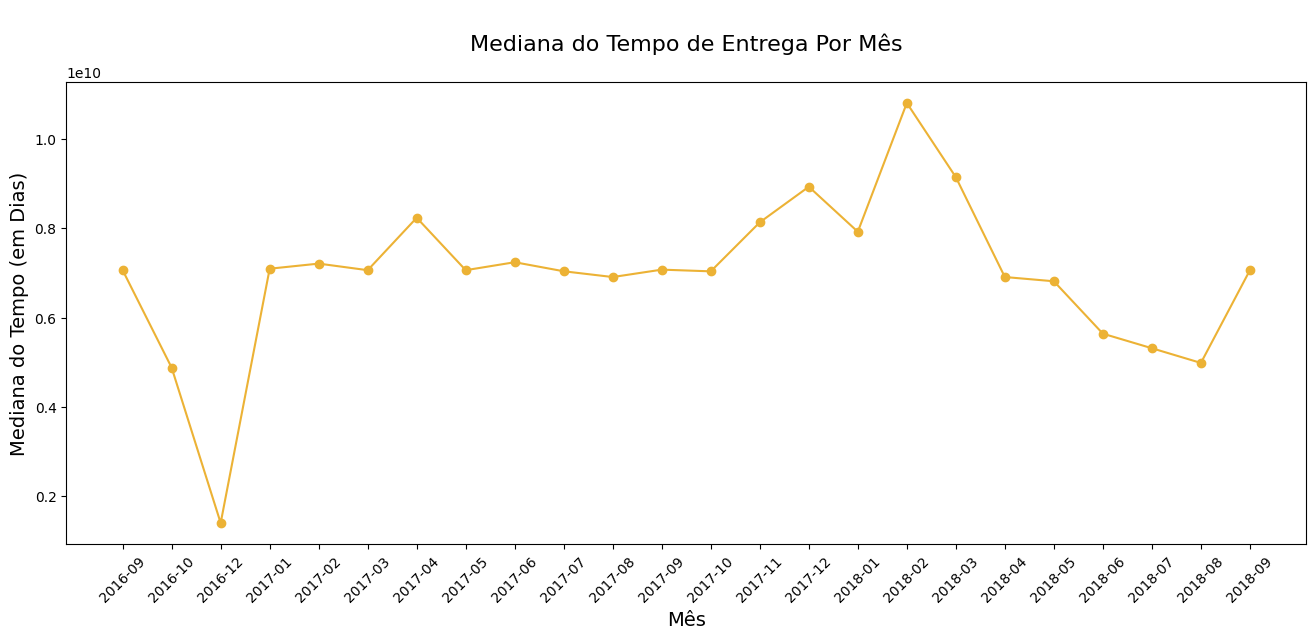

In [22]:
# Plot
fig = plt.figure (figsize = (16,6))
plt.plot(delivery_time_by_month.index, delivery_time_by_month.values / 86400, marker = 'o', color="#ECB235")
plt.title('\nMediana do Tempo de Entrega Por Mês\n', fontsize = 16)
plt.xlabel('Mês', fontsize = 14)
plt.xticks(rotation = 45)
plt.ylabel('Mediana do Tempo (em Dias)', fontsize = 14)
plt.show();

### Pergunta 2.4 - Qual a Mediana do Tempo Estimado Para Entrega Por Mês?

In [23]:
df_agrup.columns

Index(['order_id', 'order_id3', 'customer_id3', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id3',
       'seller_id3', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_id3', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'product_id',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_id', 'customer_unique_id', 'customer_uniqueid3',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_id', 'seller_zip_code_prefix', 'seller_city', '

In [24]:
df_agrup['order_accuracy_time'].head()

0   7 days 02:34:47
1   7 days 02:34:47
2   7 days 02:34:47
3   9 days 09:15:17
4   7 days 05:29:59
Name: order_accuracy_time, dtype: timedelta64[ns]

In [25]:
df_agrup['Month_order'].head()

0    2017-10
1    2017-10
2    2017-10
3    2017-08
4    2017-08
Name: Month_order, dtype: object

In [26]:
# Mediana do tempo estimado de entrega final para o cliente em cada pedido por mês
accuracy_time_by_month = df_agrup['order_accuracy_time'].groupby(df_agrup['Month_order']).median(numeric_only = False) 

In [27]:
# Lista os 5 primeiros resultados
accuracy_time_by_month.head()

Month_order
2016-09         -6 days +09:14:16
2016-10   40 days 01:13:15.500000
2016-12          21 days 08:05:16
2017-01          28 days 11:27:27
2017-02          19 days 09:55:18
Name: order_accuracy_time, dtype: timedelta64[ns]

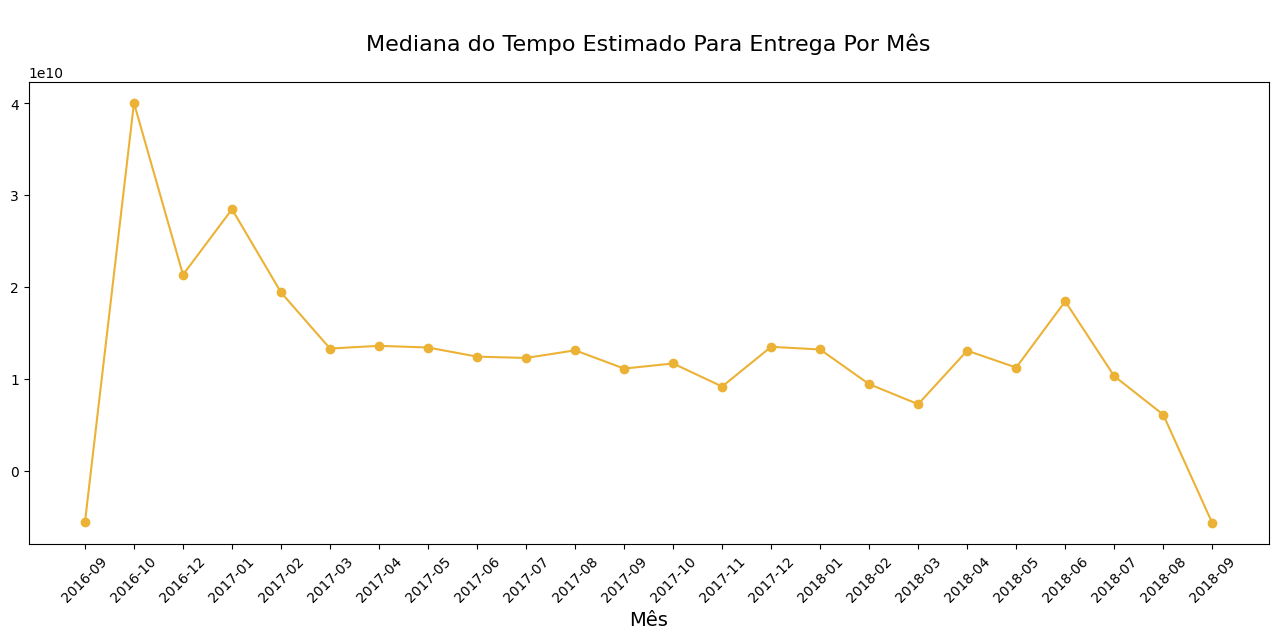

In [28]:
# Plot
fig = plt.figure (figsize = (16,6))
plt.plot(accuracy_time_by_month.index, accuracy_time_by_month.values / 86400, marker = 'o', color="#ECB235")
plt.title('\nMediana do Tempo Estimado Para Entrega Por Mês\n', fontsize = 16)
plt.xlabel('Mês', fontsize = 14)
plt.xticks(rotation = 45)
plt.ylabel('', fontsize = 14)
plt.show();

### Pergunta 2.5 - Quais as Top 10 Categorias de Produtos com *Menor* Tempo Desde o Pedido Até a Entrega?

In [29]:
df_agrup['product_category_name_english'].sample(5)

58978       watches gifts
79676           telephony
93326    office furniture
95209      bed bath table
95512      bed bath table
Name: product_category_name_english, dtype: object

In [31]:
# Top 10 categorias de produtos com menor tempo desde o pedido até a aceitação do cliente
order_time_by_category = pd.DataFrame(df_agrup['order_process_time'] \
                                      .groupby(df_agrup['product_category_name_english']) \
                                      .min().sort_values(ascending = True)[:10])

In [32]:
# Lista os 5 primeiros resultados
order_time_by_category.head()

,order_process_time
product_category_name_english,
toys,0 days 12:48:07
housewares,0 days 18:45:10
bed bath table,0 days 20:31:39
cool stuff,0 days 21:22:41
baby,0 days 21:25:11


In [34]:
# Calcula o tempo em horas
order_time_by_category['order_process_time_hours'] = order_time_by_category['order_process_time'].dt.total_seconds() / 3600

In [35]:
# Lista os 5 primeiros resultados
order_time_by_category.tail()

,order_process_time,order_process_time_hours
product_category_name_english,,
furniture decor,0 days 22:27:49,22.463611
watches gifts,0 days 22:30:59,22.516389
computers accessories,0 days 23:37:30,23.625000
auto,0 days 23:39:18,23.655000
telephony,0 days 23:43:45,23.729167


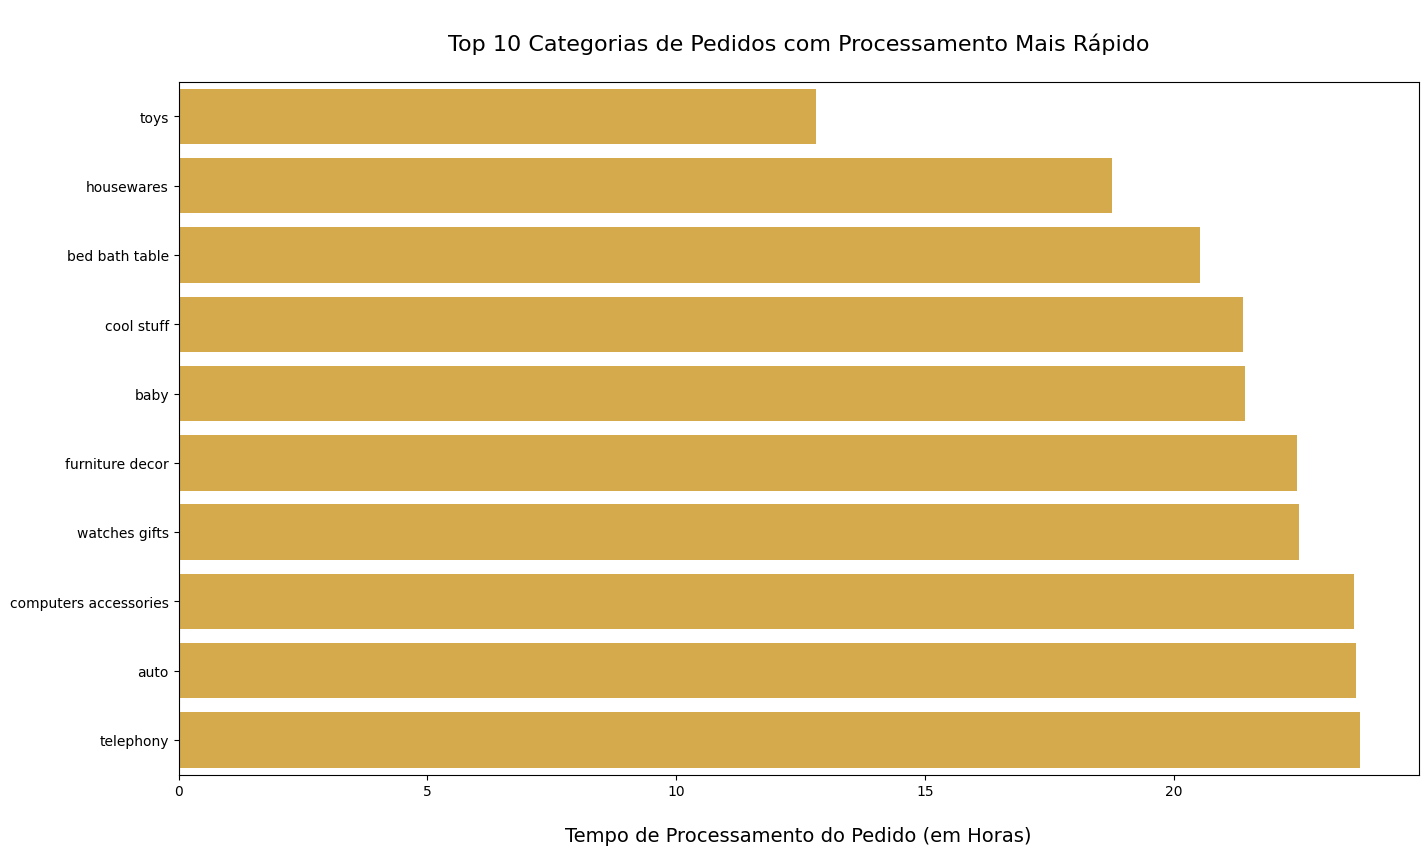

In [36]:
# Plot
fig = plt.figure (figsize = (16,9))
sns.barplot(y = order_time_by_category.index, x = order_time_by_category['order_process_time_hours'], color="#ECB235")
plt.title('\nTop 10 Categorias de Pedidos com Processamento Mais Rápido\n', fontsize = 16)
plt.xlabel('\nTempo de Processamento do Pedido (em Horas)', fontsize = 14)
plt.ylabel('', fontsize = 14)
plt.show();

### Pergunta 2.6 - Quais as Top 10 Categorias de Produtos com *Maior* Tempo Desde o Pedido Até a Entrega?

In [37]:
# Top 10 categorias de produtos com o maior tempo desde o pedido até a aceitação do cliente
order_time_by_category = pd.DataFrame (df_agrup['order_process_time'] \
                                       .groupby(df_agrup['product_category_name_english']) \
                                       .max().sort_values(ascending = False)[:10])

In [38]:
# Lista os 5 primeiros resultados
order_time_by_category.head()

,order_process_time
product_category_name_english,
auto,209 days 15:05:12
cool stuff,208 days 08:26:32
consoles games,195 days 15:12:59
office furniture,194 days 20:24:15
musical instruments,194 days 15:12:24


In [39]:
# Lista os 5 últimos resultados
order_time_by_category.tail()

,order_process_time
product_category_name_english,
watches gifts,194 days 01:11:24
home construction,191 days 11:07:30
furniture decor,189 days 20:42:57
home appliances 2,187 days 17:51:08
computers accessories,182 days 15:47:43


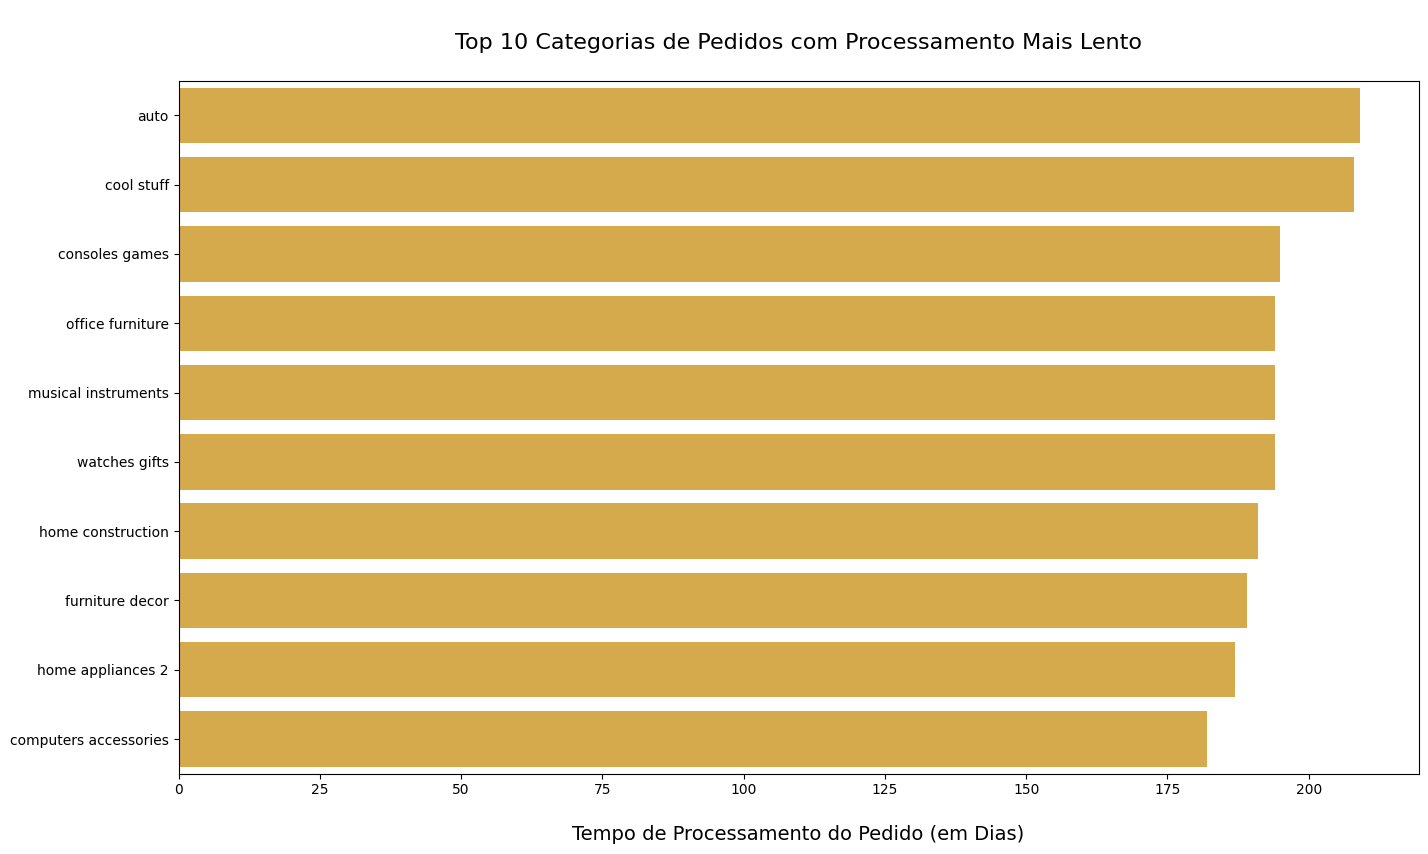

In [40]:
# Plot
fig = plt.figure (figsize = (16,9))
sns.barplot (y = order_time_by_category.index, x = order_time_by_category['order_process_time'].dt.days, color="#ECB235")
plt.title ('\nTop 10 Categorias de Pedidos com Processamento Mais Lento\n', fontsize = 16)
plt.xlabel('\nTempo de Processamento do Pedido (em Dias)', fontsize = 14)
plt.ylabel('', fontsize = 14)
plt.show();

### Pergunta 2.7 - Volume de Pedidos Por Mês ao Longo do Tempo

In [41]:
# Contagem de pedidos por mês
order_count_by_month = df_agrup['order_item_id'].groupby(df_agrup['Month_order']).count()

In [42]:
# Lista os 5 primeiros resultados
order_count_by_month.head()

Month_order
2016-09       3
2016-10     384
2016-12       1
2017-01    1010
2017-02    2014
Name: order_item_id, dtype: int64

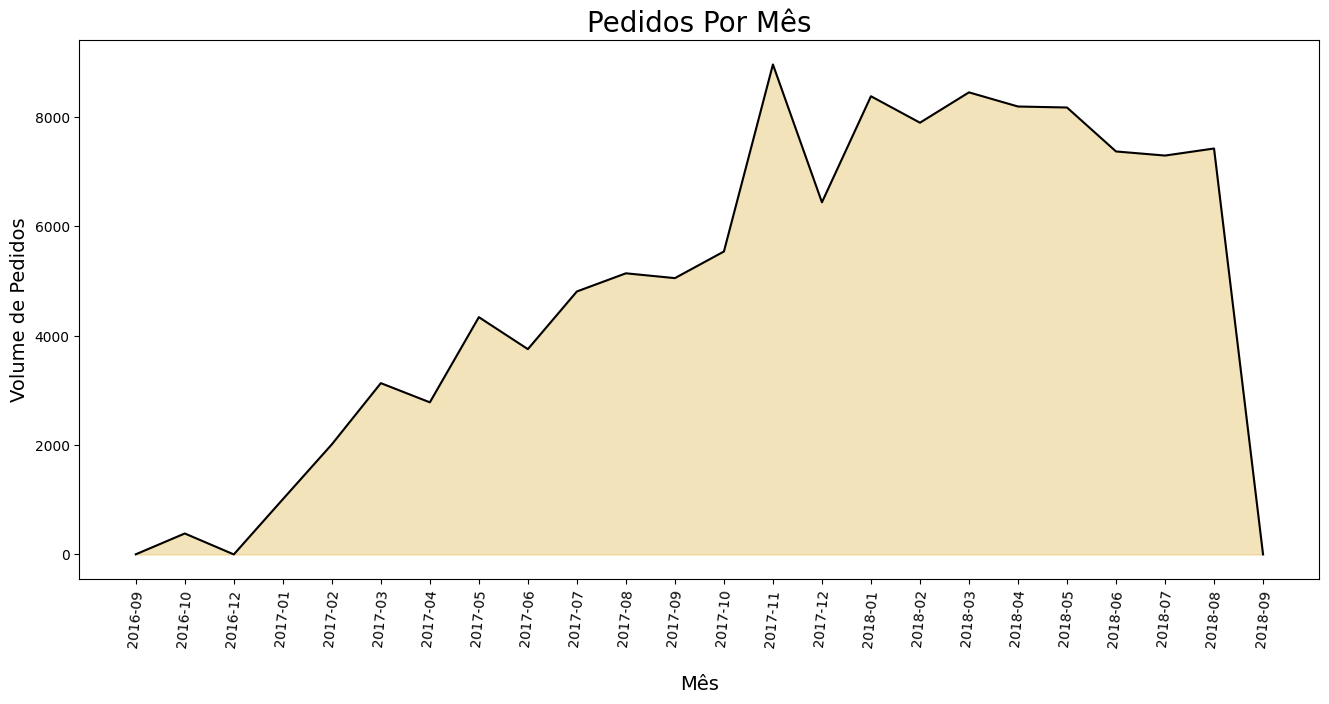

In [43]:
# Plot
plt.figure(figsize = (16,7))
plt.fill_between(order_count_by_month.index, order_count_by_month.values, color = "goldenrod", alpha = 0.3)
plt.plot(order_count_by_month.index, order_count_by_month.values, color = "black")
plt.title('Pedidos Por Mês', fontsize = 20)
plt.xlabel('\nMês', fontsize = 14)
plt.xticks(rotation = 85)
plt.ylabel('Volume de Pedidos', fontsize = 14) 
plt.show();

### Pergunta 2.8 - Faturamento Mensal Por Mês ao Longo do Tempo

In [109]:
# Faturamento Mensal
revenue_count_by_month = df_agrup['payment_value'].groupby(df_agrup['Month_order']).sum()

In [110]:
# Lista os 5 primeiros resultados
revenue_count_by_month.head()

Month_order
2016-09       347.52
2016-10     74677.62
2016-12        19.62
2017-01    187524.53
2017-02    335323.29
Name: payment_value, dtype: float64

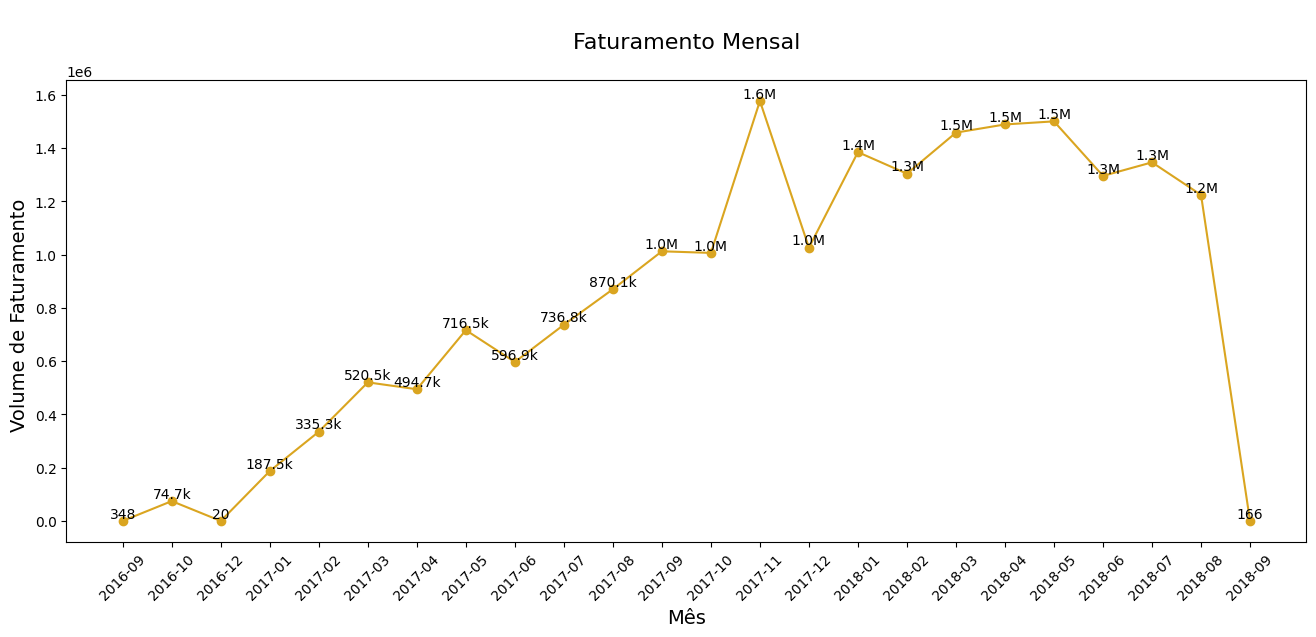

In [129]:
# Função para formatar em k e M
def format_k_m(value):
    if value >= 1_000_000:
        return f'{value/1_000_000:.1f}M'  # Milhões
    elif value >= 1_000:
        return f'{value/1_000:.1f}k'      # Milhares
    else:
        return f'{value:.0f}'              # Valor normal
    
# Plot
fig = plt.figure(figsize = (16,6))
plt.plot(revenue_count_by_month.index, revenue_count_by_month.values, marker = 'o', color = "goldenrod")
plt.title('\nFaturamento Mensal\n', fontsize = 16)
plt.xlabel('Mês', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Volume de Faturamento ', fontsize = 14)

# Adicionando labels com 'k'
for x, y in zip(revenue_count_by_month.index, revenue_count_by_month.values):
    plt.text(x, y, format_k_m(y), ha='center', va='bottom')
    
plt.show();

## Cena 3 - Análise Sobre Pagamentos

Vamos carregar outro dataset contendo detalhes sobre pagamentos e analisar os dados.

In [82]:
# Carrega os dados
df_agrup2 = pd.read_csv('dataset2.csv')

In [83]:
df_agrup2.sample(10)

,order_id,order_id3,payment_sequential,payment_type,payment_installments,payment_value
46884,ON02749,a3629884bf8956b0f572069b8a20cc55,1,credit_card,3,47.47
40359,ON91562,a9a5f4b190bf96ee22d3480fc1d17b41,1,credit_card,4,117.85
73035,ON81959,c4a28e8e313a4ec9ad2af047a0e564f7,1,credit_card,10,227.62
88788,ON72226,d32642f6d232b67e805b482eb0beae4f,1,credit_card,1,19.64
57643,ON04611,7f89850b2a19bee52e4e9f6f6fc0bde1,1,credit_card,2,68.02
18135,ON15572,5f862e4fe640e66110b40cced6911038,1,credit_card,1,29.41
98637,ON49402,fb746a5589147f8645b6c4adec4fdbdc,1,credit_card,4,450.53
23856,ON67941,c22a588780963010739e299de0a9bf51,1,credit_card,5,81.11
65340,ON35853,40eb3456ddb929efd347db4817460755,1,boleto,1,59.38
72611,ON20670,717255f43d5c9b702e9bc8c7d03a82ad,1,credit_card,5,196.36


In [84]:
# Resumo dos dados
df_agrup2.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Alterando a Escala dos Dados Para a Visualização

In [85]:
# Calcula o valor em log para padronizar os dados na mesma escala
df_agrup2['payment_value_log'] = df_agrup2['payment_value'].apply(lambda x: np.log(x) if x > 0 else 0)

In [86]:
# Amostra de dados
df_agrup2.head()

,order_id,order_id3,payment_sequential,payment_type,payment_installments,payment_value,payment_value_log
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,1,credit_card,1,18.12,2.897016
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,3,voucher,1,2.00,0.693147
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,2,voucher,1,18.59,2.922624
3,ON12238,53cdb2fc8bc7dce0b6741e2150273451,1,boleto,1,141.46,4.952017
4,ON21442,47770eb9100c2d0c44946d9cf07ec65d,1,credit_card,3,179.12,5.188056


In [87]:
# Extrai valores únicos
unique_ = df_agrup2['order_id'].nunique()

In [88]:
print("DataFrame shape: {}; ids: {}".format(df_agrup2.shape, unique_))

DataFrame shape: (103886, 7); ids: 99440


In [89]:
# Função para o plot das distribuições linear e de log
def plot_dist(values, log_values, title, color="#ECB235"):
    fig, axis = plt.subplots(1, 2, figsize = (12,4))
    axis[0].set_title("{} - Escala Linear".format(title))
    axis[1].set_title("{} - Escala de Log".format(title))
    ax1 = sns.histplot(values, color = color, ax = axis[0])
    ax2 = sns.histplot(log_values, color=color, ax = axis[1])

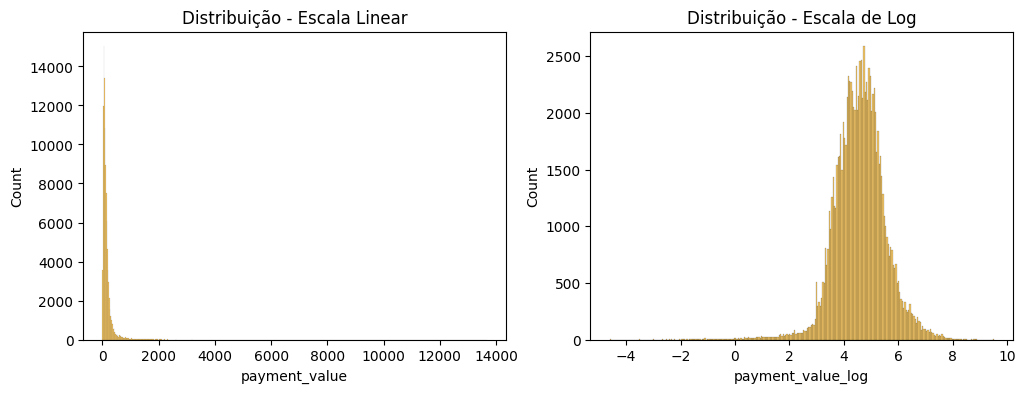

In [90]:
# Plot
plot_dist(df_agrup2.payment_value, df_agrup2.payment_value_log, "Distribuição")

### Pergunta 3.1 - Proporção dos Métodos de Pagamento

In [91]:
# Proporção dos métodos de pagamento
method_count = df_agrup2['payment_type'].value_counts().to_frame().reset_index()

In [92]:
method_value = df_agrup2.groupby('payment_type')['payment_value'].sum().to_frame().reset_index()

In [93]:
method_count.reset_index(inplace = True)

In [94]:
method_value.reset_index(inplace = True)

> Gráfico 1

In [95]:
# Plot
colors = None

# Gráfico 1
trace1 = go.Pie(labels = method_count['index'], 
                values = method_count['payment_type'], 
                domain = {'x': [0, .48]}, 
                marker = dict(colors = colors))

# Gráfico 2
trace2 = go.Pie(labels = method_value['payment_type'], 
                values = method_value['payment_value'],
                domain = {'x': [0.52, 1]}, 
                marker = dict(colors = colors))

# Layout
layout = dict(title = "Proporção dos Métodos de Pagamento", height = 400, width = 800)
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

> Gráfico 2

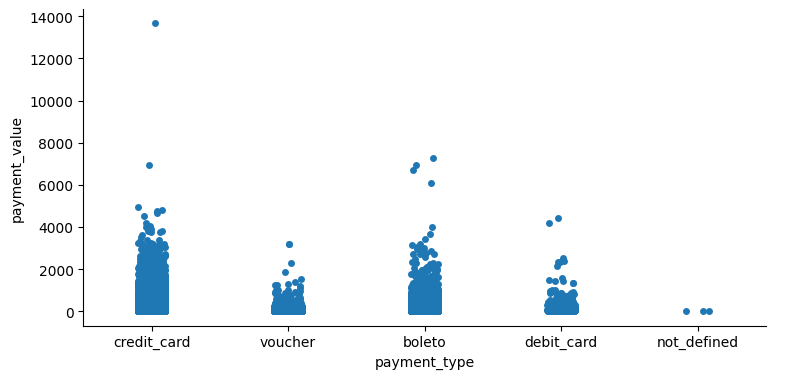

In [96]:
# Scatter Plot dos pagamentos
x = sns.catplot(x = "payment_type", y = "payment_value", data = df_agrup2, aspect = 2, height = 3.9)

> Gráfico 3

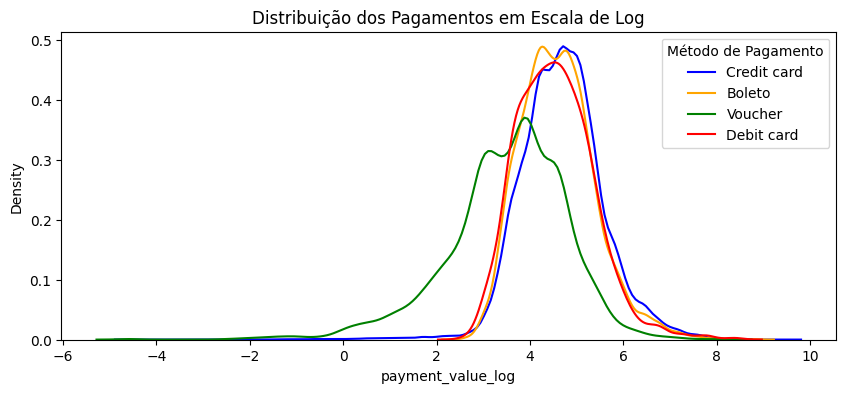

In [98]:
# Distribuição dos Pagamentos em Escala de Log
plt.figure(figsize = (10,4))

plt.title("Distribuição dos Pagamentos em Escala de Log")

p1 = sns.kdeplot(df_agrup2[df_agrup2.payment_type == 'credit_card']['payment_value_log'], color = "blue", label = 'Credit card')

p2 = sns.kdeplot(df_agrup2[df_agrup2.payment_type == 'boleto']['payment_value_log'], color = "orange", label = 'Boleto')

p3 = sns.kdeplot(df_agrup2[df_agrup2.payment_type == 'voucher']['payment_value_log'], color = "green", label = 'Voucher')

p4 = sns.kdeplot(df_agrup2[df_agrup2.payment_type == 'debit_card']['payment_value_log'], color = "red", label = 'Debit card')

plt.legend(title = 'Método de Pagamento', loc = 'upper right')

### Pergunta 3.2 - Número de Parcelas x Valor Médio da Parcela

In [99]:
df_agrup2.head()

,order_id,order_id3,payment_sequential,payment_type,payment_installments,payment_value,payment_value_log
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,1,credit_card,1,18.12,2.897016
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,3,voucher,1,2.00,0.693147
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,2,voucher,1,18.59,2.922624
3,ON12238,53cdb2fc8bc7dce0b6741e2150273451,1,boleto,1,141.46,4.952017
4,ON21442,47770eb9100c2d0c44946d9cf07ec65d,1,credit_card,3,179.12,5.188056


In [100]:
# Método usado para pagamento parcelado
df_agrup2[df_agrup2['payment_installments'] > 1]['payment_type'].value_counts().to_frame()

,count
payment_type,
credit_card,51338


In [115]:
# Prepara os dados
ins_count = df_agrup2.groupby('payment_installments').size()
ins_mean = df_agrup2.groupby('payment_installments')['payment_value'].mean()

ins_count.head()

payment_installments
0        2
1    52546
2    12413
3    10461
4     7098
dtype: int64

In [105]:
# Plot

# Gráfico 1
trace0 = go.Bar(x = ins_count.index,
                y = ins_count.values,
                name = 'Valor total por Número de Parcelas',
                marker = dict(color  = 'rgb(170,122,9)'))

# Gráfico 2
trace1 = go.Bar(x = ins_mean.index,
                y = ins_mean.values,
                name = 'Valor Médio da compra por Parcela',
                marker = dict(color = 'rgb(24,20,24)'))

# Layout
fig = tools.make_subplots(rows = 1, cols = 2, print_grid = False)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height = 400, width = 1000, title = 'Pagamento Parcelado', legend = dict(orientation = "h"))
fig.show()

Quando plotamos o número de parcelas, podemos ver alguns padrões. A maioria das empresas no Brasil oferece a opção de dividir o pagamento em até 10 parcelas e o valor médio do produto aumenta até esse número. Sete e nove prestações não são habituais.

### Pergunta 3.3 - Total de Vendas x Dia da Semana ao Longo do Tempo

In [130]:
# Total de vendas x dia da semana
sales_per_purchase_month = df_agrup.groupby(['order_purchase_month', 'order_purchase_mon', 'order_purchase_day'], 
                                          as_index = False).payment_value.sum()

In [131]:
# Ordena por mês
sales_per_purchase_month = sales_per_purchase_month.sort_values(by = ['order_purchase_month'], ascending = True)

In [132]:
# Amostra dos dados
sales_per_purchase_month.head()

,order_purchase_month,order_purchase_mon,order_purchase_day,payment_value
0,1,Jan,Fri,206844.41
1,1,Jan,Mon,265600.11
2,1,Jan,Sat,165882.44
3,1,Jan,Sun,162629.79
4,1,Jan,Thu,229321.25


In [133]:
# Plot

# Gráfico
fig = px.line(sales_per_purchase_month, 
              x = "order_purchase_mon", 
              y = "payment_value", 
              color = 'order_purchase_day', 
              title = 'Total de Vendas x Dia da Semana')

# Layout
fig.update_layout(title = "Total de Vendas x Dia da Semana",
                  xaxis_title = "Meses",
                  yaxis_title = "Total Monetário de Vendas")
fig.show()

### Pergunta 3.4 - Top 10 Categorias Por Faturamento

In [134]:
# Cópia do dataset
df2 = df_agrup.copy()

In [135]:
# Agrupamento
sales_per_category = df2.groupby(['order_purchase_mon', 'product_category_name_english'], 
                                 as_index = False).payment_value.sum()[:10]

In [136]:
# Ordenação
sales_per_category = sales_per_category.sort_values(by = ['payment_value'], ascending = False)

In [137]:
# Colunas
sales_per_category.columns = ['Purchase Month', 'Product Category', 'Sales Revenue']

In [138]:
# Amostra de dados
sales_per_category.head()

,Purchase Month,Product Category,Sales Revenue
7,Apr,bed bath table,162940.63
5,Apr,auto,90480.93
6,Apr,baby,79162.37
4,Apr,audio,10616.44
8,Apr,books general interest,9386.39


In [139]:
# Plot
fig = px.bar(sales_per_category, 
             y = 'Sales Revenue', 
             x = 'Product Category', 
             text = 'Sales Revenue', 
             hover_data = ['Purchase Month'])
fig.update_traces(texttemplate = '%{text:.2s}', 
                  textposition = 'outside')
fig.update_layout(
    barmode = 'stack', 
    uniformtext_minsize = 8, 
    uniformtext_mode = 'hide', 
    xaxis_tickangle = -75,
    height = 700  
)
fig.update_yaxes(title_text = 'Faturamento de Vendas')
fig.update_xaxes(title_text = 'Categoria de Produto')
fig.show();

In [140]:
%reload_ext watermark
%watermark -a "silmara Basso"

Author: silmara Basso



In [ ]:
#%watermark -v -m

Python implementation: CPython
Python version       : 3.13.6
IPython version      : 9.4.0

Compiler    : Clang 15.0.0 (clang-1500.3.9.4)
OS          : Darwin
Release     : 23.2.0
Machine     : arm64
Processor   : arm
CPU cores   : 16
Architecture: 64bit



In [ ]:
#%watermark --iversions

matplotlib: 3.10.3
plotly    : 6.2.0
colorlover: 0.3.0
pandas    : 2.3.1
numpy     : 2.3.1
seaborn   : 0.13.2



# Fim